<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **훈련데이터 샘플의 갯수를 과제 제출폼에 제출하세요.**

In [3]:
# test 데이터 : date 컬럼 값이 2015-01-01 보다 큰 row 추출
test = df[df['date']>'2015-01-01']

# train 데이터 : test 데이터를 제외(drop)한 나머지 데이터
train = df.drop(test.index)

In [9]:
# train 데이터 확인
train.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
11,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
12,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
13,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
16,1875500060,20140731T000000,395000.0,3,2.00,1890,14040,2.0,0,0,...,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018
17,6865200140,20140529T000000,485000.0,4,1.00,1600,4300,1.5,0,0,...,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300


In [10]:
# test 데이터 확인
test.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7,2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
10,1736800520,20150403T000000,662500.0,3,2.5,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
14,1175000570,20150312T000000,530000.0,5,2.0,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
15,9297300055,20150124T000000,650000.0,4,3.0,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
19,7983200060,20150424T000000,230000.0,3,1.0,1250,9774,1.0,0,0,...,7,1250,0,1969,0,98003,47.3343,-122.306,1280,8850
29,1873100390,20150302T000000,719000.0,4,2.5,2570,7173,2.0,0,0,...,8,2570,0,2005,0,98052,47.7073,-122.110,2630,6026


In [11]:
# 데이터 양 확인 -> train:14,633개
train.shape, test.shape

((14633, 21), (6980, 21))

### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- **테스트세트의 MAE 값을 과제 제출폼에 제출하세요.**

In [12]:
# 피쳐 설정 및 데이터 준비 -> 화장실 개수, 주택 면적
features = ['bathrooms', 'sqft_living']
X_train = train[features]
X_test = test[features]

# 타깃 설정 및 데이터 준비 -> 주택 가격
target = 'price'
y_train = train[target]
y_test = test[target]

# 패키지 설치 및 객체 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 훈련한 모델에 테스트 데이터의 피쳐를 넣어 예측값 도출
y_pred_test = model.predict(X_test)

# 평균 제곱 오차값 구하기 : 테스트 데이터의 타깃값과 예측값이 얼만큼 차이가 있는지?
from sklearn.metrics import mean_absolute_error
mae_test = mean_absolute_error(y_test, y_pred_test)

print("테스트 세트의 MAE값 :", mae_test)

테스트 세트의 MAE값 : 179252.52593261775


### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **sqft_living의 회귀계수를 과제 제출폼에 제출하세요.**

In [15]:
# 회귀계수 (피쳐 설정 시 입력한 순서대로 첫 번째 - 화장실개수, 두 번째 - 주택 면적)
b1, b2 = model.coef_

# 절편
b0 = model.intercept_ 

print("y = " + str(b1) + "x1 + " + str(b2) + "x2 - "+ str(abs(b0)))

y = -5158.925914109234x1 + 286.1375355497683x2 - 50243.56279640319


### 4) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **테스트 데이터에 대한 R^2 값을 과제 제출폼에 제출하세요.**

In [16]:
# 회귀방정식 평가지표 (평균 제곱 오차값은 위에서 계산하였으므로 제외한 나머지 구하기)
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred_test)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_test)

In [17]:
mse, mae_test, rmse, r2

(71083994178.75656,
 179252.52593261775,
 266615.81757044455,
 0.45999300199894533)

## 🔥도전과제

### 5) 두가지 이상 특성을 선택하여 특성공학(feature engineering)을 진행합니다. (kaggle notebook을 참고하여 중요한 특성을 고르는 것이 힌트입니다.)
- EDA를 자세히 진행하세요
- 특성공학 과정을 자세히 기술하세요
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어를 계산하고 분석하세요
- 만들어진 회귀계수를 사용해 모델을 설명하세요.
- 모델이 과적합인지/과소적합인지 설명하세요.
- 메신저 general 채널에서 4개 스코어를 제시하고 본인이 고른 특성, 특성공학 방법 등을 간략하게 공유하세요

In [18]:
# 사용하지 않을 컬럼 삭제 : id, date
df_selected = df.drop(["id", "date"], axis=1)

# describe로 컬럼별 기초통계값 살펴보기
df_selected.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [19]:
# 결측치 확인 : 없음
df_selected.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
# 중복값 확인 -> 5개 확인
print("중복값 제거 전 :", df_selected.shape[0])
print("중복값 :", df_selected.duplicated().sum())

# 중복값 제거 - 나중에 나오는 중복값을 제거
df_selected.drop_duplicates(keep="first", inplace=True)

# 데이터 volume 확인
print("중복값 제거 후 : row {0}개, column {1}개".format(df_selected.shape[0],df_selected.shape[1]))

중복값 제거 전 : 21613
중복값 : 5
중복값 제거 후 : row 21608개, column 19개


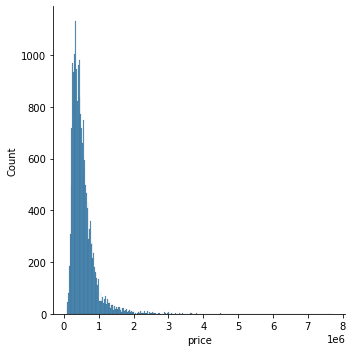

In [21]:
# target 설정 및 범주 확인
import seaborn as sns
target="price"
sns.displot(df_selected[target])

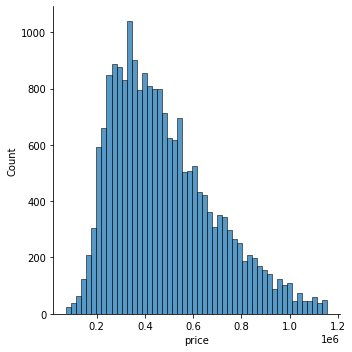

In [22]:
# outlier : 상위 5%로 설정
price_top_5percent = df_selected[target].quantile(q=0.95)

# outlier 제거
df_selected = df_selected[df_selected[target] < price_top_5percent]

# 시각화로 살펴보기
sns.displot(df_selected[target])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


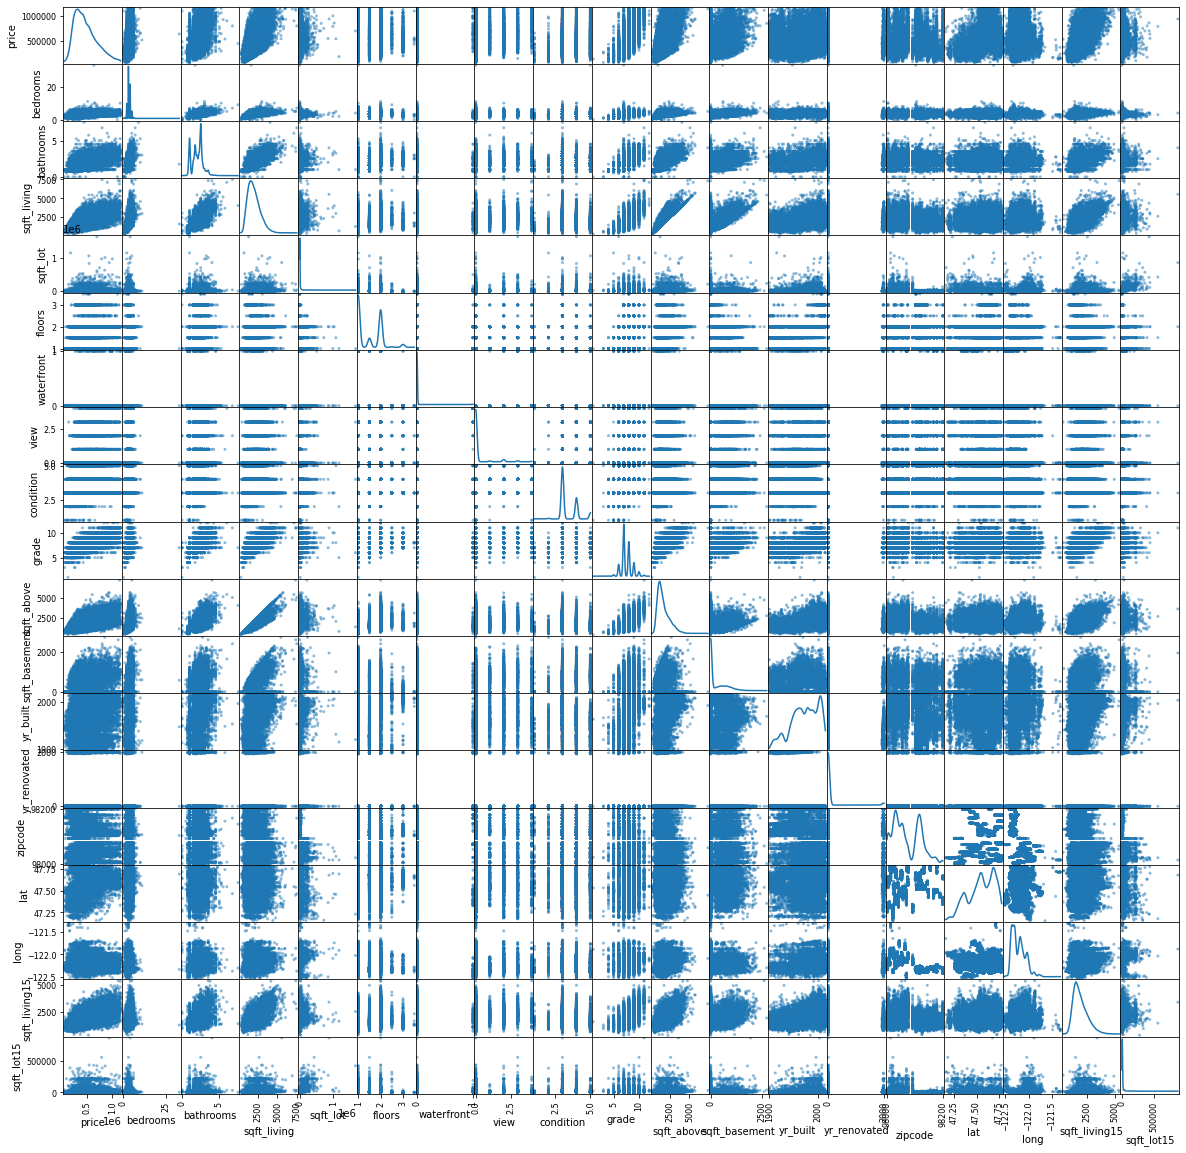

In [23]:
# 모든 컬럼들을 산점도로 통해 시각화하여 살펴보기
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df_selected, alpha=0.5, figsize=(20, 20), diagonal='kde')
plt.show()

# target은 price이므로 산점도 매트릭스의 최상단 1행 혹은 우측 1열의 분포 양상 참고

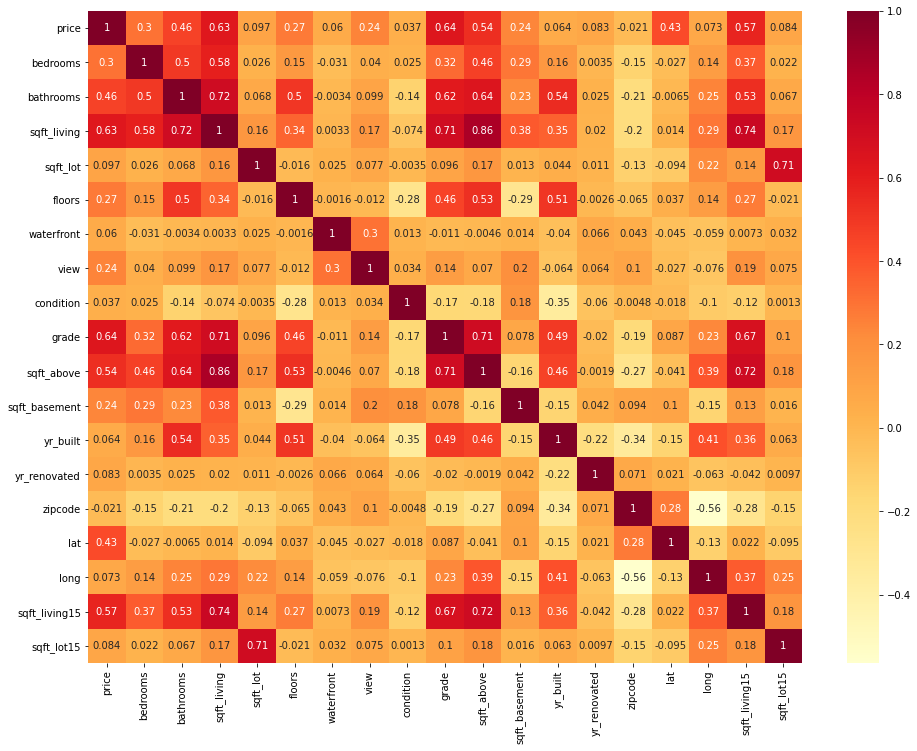

In [24]:
# 상관계수 파악 & 시각화로 살펴보기
# 상관계수 구하기
df_selected_corr = df_selected.corr()

# 상관계수 히트맵 확인
plt.figure(figsize=(16, 12))
sns.heatmap(df_selected_corr, annot=True, cmap="YlOrRd");

# target은 price이므로 히트맵 최상단 1행 혹은 우측 1열의 색상/수치 참고

In [25]:
# 산점도와 상관계수를 통해 features가 target과 어떤 관계를 가지고 있는지 파악
# 1) 산점도 : sqft_living, sqft_above, grade, bathroom 정도가 눈에 띔

# 2) 상관계수 : 순서대로 나열 후 상관계수 수치를 확인하여 feature 선택 여부 결정
df_target_corr = df_selected_corr[['price']].sort_values('price', ascending=False)
# BEST 5 : grade, sqft_living, sqft_living15, sqft_above, bathrooms
df_target_corr[1:6]

,price
grade,0.635743
sqft_living,0.627518
sqft_living15,0.568364
sqft_above,0.535486
bathrooms,0.459825


In [26]:
# sqft_living, sqft_living15, sqft_above는 모두 '넓이'와 관련된 feature이므로, 상관관계가 가장 높은 feature 1개만 선택하여 사용.
features = ['grade', 'sqft_living', 'bathrooms']

# 상단에서 분리한 train/test 데이터를 가공 : 선택한 features만 추출 & feature/target분리
X_train = train[features]
y_train = train[["price"]]

X_test = test[features]
y_test = test[["price"]]

print("훈련 데이터의 features & target 확인", X_train.shape, y_train.shape)
print("테스트 데이터의 features & target 확인", X_test.shape, y_test.shape)

훈련 데이터의 features & target 확인 (14633, 3) (14633, 1)
테스트 데이터의 features & target 확인 (6980, 3) (6980, 1)


In [27]:
# 다중회귀모델 생성 & 학습
model_selected = LinearRegression().fit(X_train, y_train)

# 학습한 모델에 테스트 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred = model_selected.predict(X_test)

# 테스트 데이터의 예측값과 실제 테스트 데이터의 target값을 비교 -> 스코어계산
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse ** 0.5
r2_test = r2_score(y_test, y_pred)

print("""
~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_test, mse_test, rmse_test, r2_test))


~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 168576.5110854926
2. 평균 제곱 오차 : 64404192149.720665
3. 평균 제곱근 오차 : 266615.81757044455
4. R-squared Score : 0.5107377566039



In [28]:
# 회귀계수 확인
for i in range(len(features)):
  print("{0}번째 feature {1}의 회귀 계수 : {2} ".format(i+1, features[i], model_selected.coef_[0][i]))

print("\n회귀 모델의 절편 : {}".format(model_selected.intercept_))

1번째 feature grade의 회귀 계수 : 100170.101064154 
2번째 feature sqft_living의 회귀 계수 : 208.99095337547635 
3번째 feature bathrooms의 회귀 계수 : -36534.23874972989 

회귀 모델의 절편 : [-591031.20426466]


In [29]:
# 훈련용/테스트용 데이터 셋 훈련 후 다양한 평가지표 수치를 계산, 비교 해보자.
# R2 스코어는 0과 1사이에서 어떤 수치를 나타내는지 비교해보자

# 1) 훈련용 데이터로 예측값 도출
# 다중회귀모델 생성 & 학습
model_selected = LinearRegression().fit(X_train, y_train)

# 학습한 모델에 훈련용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_train = model_selected.predict(X_train)


# 2) 테스트용 데이터로 예측값 도출
# 학습한 모델에 테스트용 데이터의 features를 넣고 훈련하여 예측값 도출
y_pred_test = model_selected.predict(X_test)

In [30]:
# 훈련용 데이터의 예측값과 실제 훈련용 target 값 비교 -> 스코어계산

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse ** 0.5
r2_train = r2_score(y_train, y_pred_train)

print("""
~ 훈련용 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_train, mse_train, rmse_train, r2_train))



# 테스트 데이터의 예측값과 실제 테스트 target값 비교 -> 스코어계산
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mse ** 0.5
r2_test = r2_score(y_test, y_pred)

print("""
~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : {0}
2. 평균 제곱 오차 : {1}
3. 평균 제곱근 오차 : {2}
4. R-squared Score : {3}
""".format(mae_test, mse_test, rmse_test, r2_test))



~ 훈련용 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 160923.67041011236
2. 평균 제곱 오차 : 61509526144.60734
3. 평균 제곱근 오차 : 266615.81757044455
4. R-squared Score : 0.5486260943067908


~ 테스트 데이터 학습 결과 평가 지표 ~
1. 평균 절대 오차 : 168576.5110854926
2. 평균 제곱 오차 : 64404192149.720665
3. 평균 제곱근 오차 : 266615.81757044455
4. R-squared Score : 0.5107377566039



## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)